In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd

In [93]:
cv=pd.read_csv('http://187.191.75.115/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip', encoding='ISO-8859-1')
cv.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-27,09e8dc,2,9,15,1,15,15,37,2,...,2,2,2,2,2,1,99,MÃ©xico,99,1
1,2020-04-27,1dd782,2,12,9,1,15,9,3,1,...,2,1,2,2,2,2,99,MÃ©xico,99,97
2,2020-04-27,0efbaf,2,9,28,2,16,28,32,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
3,2020-04-27,013a6c,1,3,15,2,15,15,106,1,...,2,1,2,2,1,3,99,MÃ©xico,99,97
4,2020-04-27,091a48,1,12,15,2,15,15,31,2,...,2,2,2,2,2,2,99,MÃ©xico,99,2


In [5]:
mun=gpd.read_file('/Users/Raul/Desktop/Programacion/Python/Covid/muni_2018gw/muni_2018gw.shp')

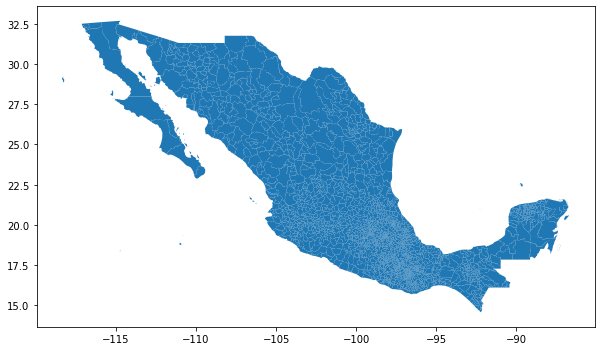

In [4]:
mun.plot(figsize=(10,10));

In [7]:
cv['mrg']=[str(i)+'-'+str(j) for i,j in zip(cv.ENTIDAD_RES,cv.MUNICIPIO_RES)]

In [6]:
cv.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,mrg
0,2020-04-26,031e57,1,4,9,2,9,9,16,2,...,2,1,2,99,2,99,MÃ©xico,99,2,9-16
1,2020-04-26,0a9147,2,12,26,1,26,26,30,1,...,2,2,2,1,2,99,MÃ©xico,99,97,26-30
2,2020-04-26,0f671b,2,12,5,2,5,5,30,1,...,2,2,2,1,2,99,MÃ©xico,99,97,5-30
3,2020-04-26,15f384,2,12,25,1,25,2,5,2,...,2,2,2,99,2,99,MÃ©xico,99,2,2-5
4,2020-04-26,037e26,2,4,14,1,14,14,120,2,...,2,2,2,99,2,99,MÃ©xico,99,2,14-120


In [8]:
mun['mrg']=[str(int(i))+'-'+str(int(j)) for i,j in zip(mun.CVE_ENT,mun.CVE_MUN)]

In [8]:
mun.head()

,CVE_ENT,CVE_MUN,CVEGEO,NOM_ENT,AREA,PERIMETER,NOM_MUN,COV_,COV_ID,geometry,mrg
0,01,001,01001,Aguascalientes,116635.92455,1166.35925,Aguascalientes,0,1,"POLYGON ((-102.09775 22.02325, -102.09857 22.0...",1-1
1,01,002,01002,Aguascalientes,54337.42654,543.37427,Asientos,1,2,"POLYGON ((-101.99941 22.21951, -101.99940 22.2...",1-2
2,01,003,01003,Aguascalientes,92335.78320,923.35783,Calvillo,2,3,"POLYGON ((-102.57625 21.96778, -102.57626 21.9...",1-3
3,01,004,01004,Aguascalientes,12838.35453,128.38355,CosÃ­o,3,4,"POLYGON ((-102.25320 22.37449, -102.25239 22.3...",1-4
4,01,005,01005,Aguascalientes,49989.50926,499.89509,JesÃºs MarÃ­a,4,5,"POLYGON ((-102.31034 22.03716, -102.30653 22.0...",1-5


In [9]:
mu=mun[['mrg','geometry']]

In [10]:
gcv=pd.merge(cv,mu,on='mrg')

In [11]:
gcv.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,mrg,geometry
0,2020-04-26,031e57,1,4,9,2,9,9,16,2,...,1,2,99,2,99,MÃ©xico,99,2,9-16,"POLYGON ((-99.16371 19.45643, -99.16372 19.456..."
1,2020-04-26,16e0c3,1,12,9,2,9,9,16,1,...,2,2,2,1,99,MÃ©xico,99,97,9-16,"POLYGON ((-99.16371 19.45643, -99.16372 19.456..."
2,2020-04-26,000d46,2,12,9,2,21,9,16,1,...,2,2,1,1,99,MÃ©xico,99,97,9-16,"POLYGON ((-99.16371 19.45643, -99.16372 19.456..."
3,2020-04-26,01ac32,1,9,9,1,9,9,16,2,...,2,2,99,2,99,MÃ©xico,99,2,9-16,"POLYGON ((-99.16371 19.45643, -99.16372 19.456..."
4,2020-04-26,1327a7,1,4,15,1,9,9,16,1,...,2,2,99,2,99,MÃ©xico,99,97,9-16,"POLYGON ((-99.16371 19.45643, -99.16372 19.456..."


In [11]:
gcv=gpd.GeoDataFrame(gcv)

In [12]:
pos=gcv[gcv.RESULTADO==1]

In [13]:
pos=pos['mrg'].value_counts().reset_index()
pos.rename(columns={'index':'mrg','mrg':'cnt'},inplace=True)

In [14]:
pos=gpd.GeoDataFrame(pd.merge(pos,mu,on='mrg'))
pos

,mrg,cnt,geometry
0,2-4,733,"POLYGON ((-116.75525 32.55660, -116.75295 32.5..."
1,9-7,724,"POLYGON ((-99.05813 19.40072, -99.05814 19.400..."
2,25-6,539,"POLYGON ((-107.14834 25.25916, -107.14772 25.2..."
3,9-5,513,"POLYGON ((-99.11789 19.59059, -99.11860 19.584..."
4,27-4,509,"POLYGON ((-92.61030 18.06882, -92.61189 18.062..."
...,...,...,...
762,30-54,1,"POLYGON ((-95.76649 18.31475, -95.76651 18.314..."
763,7-92,1,"POLYGON ((-93.38287 17.29748, -93.38310 17.296..."
764,11-44,1,"POLYGON ((-100.91078 20.56958, -100.91070 20.5..."
765,16-19,1,"POLYGON ((-102.61135 19.88179, -102.61146 19.8..."


In [15]:
mun[['CVE_ENT','NOM_ENT']].drop_duplicates().reset_index(drop=True)

,CVE_ENT,NOM_ENT
0,01,Aguascalientes
1,02,Baja California
2,03,Baja California Sur
3,04,Campeche
4,05,Coahuila de Zaragoza
5,06,Colima
6,07,Chiapas
7,08,Chihuahua
8,09,Ciudad de MÃ©xico
9,10,Durango


In [16]:
neg=gpd.GeoDataFrame(mu[~mu['mrg'].isin(pos['mrg'])])
neg

,mrg,geometry
2,1-3,"POLYGON ((-102.57625 21.96778, -102.57626 21.9..."
3,1-4,"POLYGON ((-102.25320 22.37449, -102.25239 22.3..."
20,3-9,"MULTIPOLYGON (((-111.56122 26.55573, -111.5606..."
26,4-6,"POLYGON ((-89.74847 20.17927, -89.73734 20.165..."
27,4-7,"POLYGON ((-91.73869 17.93618, -91.73954 17.935..."
...,...,...
2456,32-52,"POLYGON ((-101.78386 22.16604, -101.78366 22.1..."
2457,32-53,"POLYGON ((-101.94821 22.65201, -101.94607 22.6..."
2458,32-54,"POLYGON ((-101.65599 22.51381, -101.65586 22.5..."
2459,32-55,"POLYGON ((-102.69428 22.62230, -102.69476 22.6..."


## Graficación

In [208]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature


from matplotlib import cm
import matplotlib.ticker as mticker
#from matplotlib.colors import ListedColormap
from matplotlib.offsetbox import AnchoredText

from datetime import date

from geopy.distance import geodesic

(array([716.,  24.,  10.,   6.,   4.,   0.,   4.,   1.,   0.,   2.]),
 array([  1. ,  74.2, 147.4, 220.6, 293.8, 367. , 440.2, 513.4, 586.6,
        659.8, 733. ]),
 <a list of 10 Patch objects>)

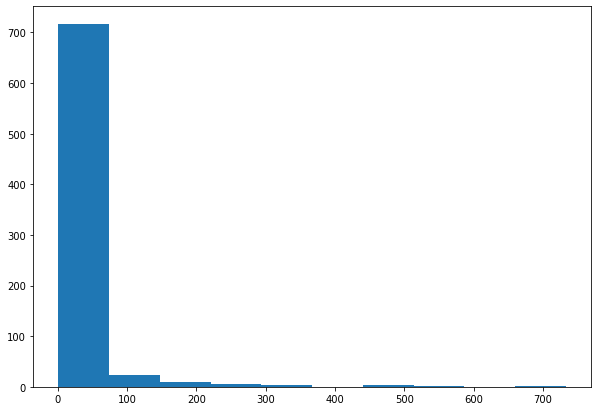

In [20]:
plt.figure(figsize=(10,7))
plt.hist(pos.cnt)

In [34]:
date.today().isoformat()

'2020-04-28'

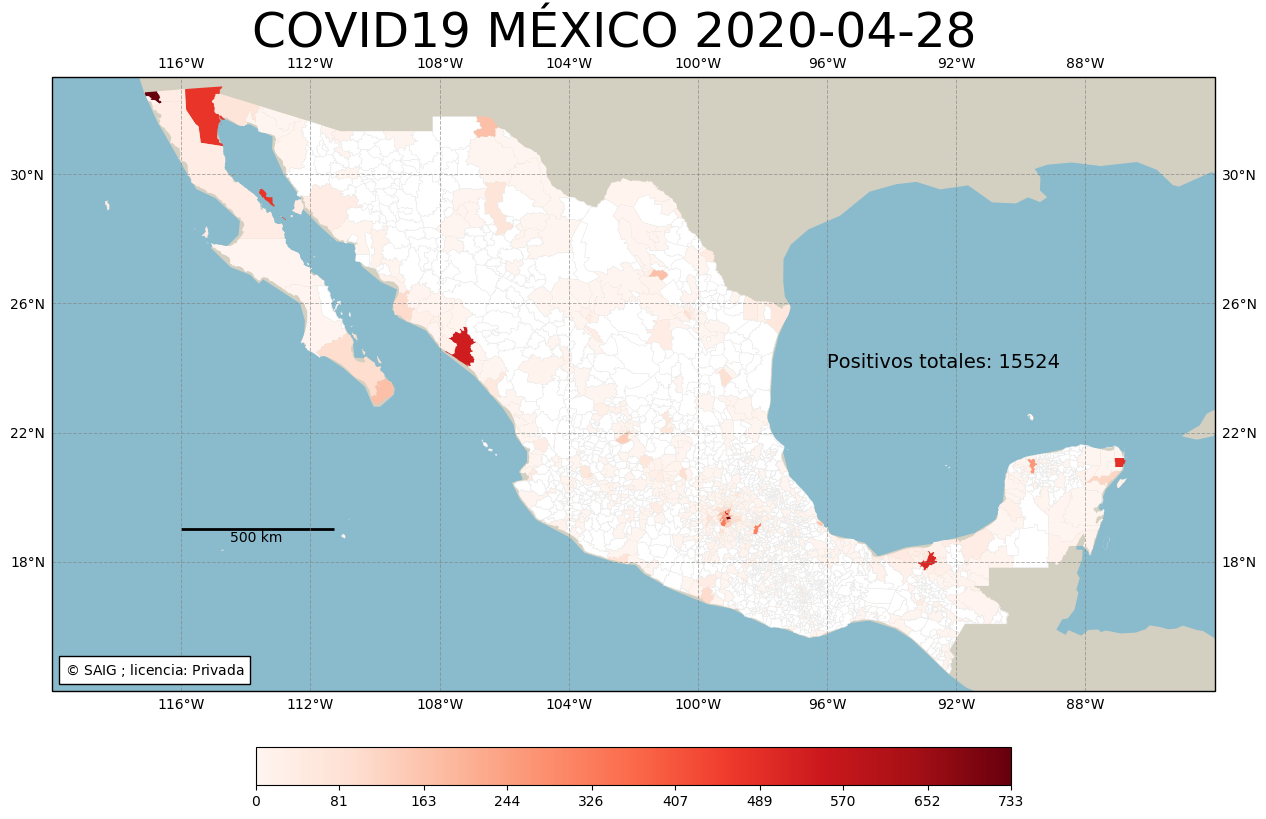

In [89]:
plt.figure(dpi=100,figsize=(15,15))
norm=cm.colors.Normalize(vmin=0,vmax=max(pos.cnt))
cmap=cm.Reds
ax=plt.axes(projection=ccrs.PlateCarree())
ext=[-120,-84,14,33]
ax.set_extent(ext, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN,facecolor='#8ABBCD')
ax.add_feature(cfeature.LAND,facecolor='#D3D0C1')

pos.plot('cnt',ax=ax,cmap=cmap,vmin=0,vmax=max(pos.cnt))
neg.plot(ax=ax,color='white',ec='#ECEBEB',linewidth=.3)
#ded.centroid.plot(ax=ax,markersize=pos.cnt,alpha=.4,color='k')
#est.boundary.plot(ax=ax,linewidth=.3,ec='k')
ticks=np.round(np.linspace(0,max(pos.cnt),10))
plt.colorbar(cm.ScalarMappable(norm=norm,cmap=cmap),ax=ax,shrink=.65,ticks=ticks,orientation='horizontal',pad=.05)


gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=.7,color='gray',alpha=0.6,linestyle='--')

gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER

gl.xlocator=mticker.FixedLocator(np.arange(ext[0],ext[1]+4,4))
gl.ylocator=mticker.FixedLocator(np.arange(ext[2],ext[3]+4,4))

plt.suptitle('COVID19 MÉXICO '+date.today().isoformat(),fontsize=35,y=.73)

source='SAIG'
license='Privada'
text= AnchoredText("$\copyright$ {} ; licencia: {}"
                  ''.format(source,license),loc=3,prop={'size':10},frameon=True)

ax.add_artist(text)

plt.text(-96,24,'Positivos totales: '+str(np.sum(pos.cnt)),fontsize=14)

x1=-116
x2=-111.27

plt.hlines(19,x1,x2,linewidth=2)
plt.text(-114.5,18.6,'500 km');

#plt.savefig('aiuda.png',dpi=300,bbox_inches='tight');

In [84]:
p1 = (18, -116)
p2 = (18, -115)
geodesic(p1, p2).km

105.90485437837083

In [22]:
est=gpd.read_file('/Users/Raul/Desktop/Programacion/Python/Covid/dest2018gw/dest2018gw.shp')

In [23]:
ded=gcv[(gcv.FECHA_DEF!='9999-99-99') & (gcv.RESULTADO==1)]
ded=ded['mrg'].value_counts().reset_index()
ded.rename(columns={'index':'mrg','mrg':'cnt'},inplace=True)
ded=gpd.GeoDataFrame(pd.merge(ded,mu,on='mrg'))

ded

,mrg,cnt,geometry
0,2-4,121,"POLYGON ((-116.75525 32.55660, -116.75295 32.5..."
1,25-6,89,"POLYGON ((-107.14834 25.25916, -107.14772 25.2..."
2,9-5,63,"POLYGON ((-99.11789 19.59059, -99.11860 19.584..."
3,27-4,58,"POLYGON ((-92.61030 18.06882, -92.61189 18.062..."
4,23-5,54,"POLYGON ((-86.80184 21.21195, -86.80184 21.211..."
...,...,...,...
294,28-33,1,"POLYGON ((-97.90829 26.05750, -97.90764 26.052..."
295,12-69,1,"POLYGON ((-98.47410 17.36658, -98.47428 17.366..."
296,23-6,1,"POLYGON ((-88.65517 19.21769, -88.67001 19.217..."
297,29-29,1,"POLYGON ((-98.20681 19.24910, -98.20701 19.249..."


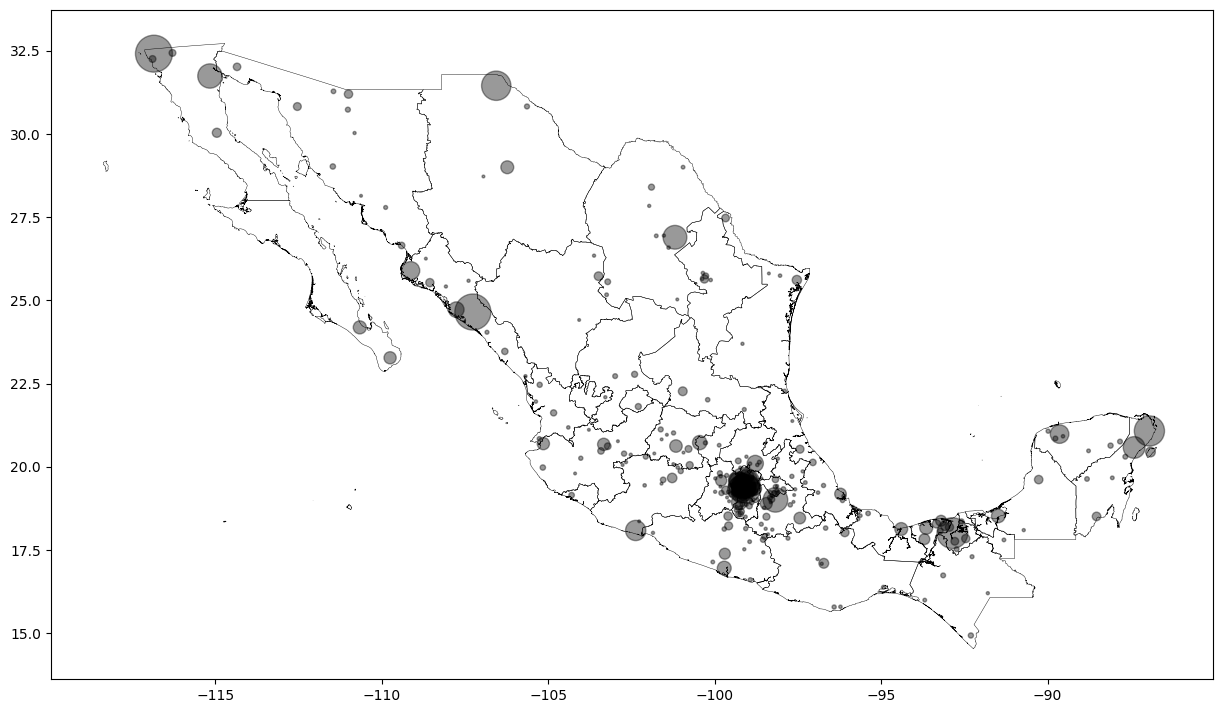

In [312]:
ax=est.boundary.plot(linewidth=.3,ec='k',figsize=(15,15))
ded.centroid.plot(ax=ax,markersize=pos.cnt,alpha=.4,color='k')

In [144]:
def readtxt(rut):
    dat=pd.read_csv(rut,delim_whitespace=True,header=None,names=['lon','lat','g'],
                   dtype={'lon': np.float32, 'lat': np.float32, 'g':np.float32}).sort_values(by='lat',ascending=False).reset_index(drop=True)
    #dat=dat.sort_values(by='lat',ascending=False).reset_index(drop=True)
    dat['lon']=-dat['lon']
    
    return dat

In [145]:
%timeit readtxt("/Users/Raul/Desktop/Data/modgeohat/Anomalia de Helmert.txt")

178 ms ± 3.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [146]:
dat=readtxt("/Users/Raul/Desktop/Data/modgeohat/Anomalia de Helmert.txt")
dat.head()

,lon,lat,g
0,-118.979172,32.979172,-55.292000
1,-97.270828,32.979172,-24.312000
2,-97.187500,32.979172,-23.757999
3,-97.145828,32.979172,-24.975000
4,-97.104172,32.979172,-25.481001


In [179]:
def imgcreator(dat): 
    mat=[]
    for i in dat.lat.unique():
        df=dat[dat.lat==i]
        df=df.sort_values(by='lon')
        vc=list(np.array(df.g))
        mat.append(vc)
        #mat.append(list(dat[dat.lat==i].sort_values(by='lon').g))
    mat=np.array(mat)
    ggt=[dat.lon.min()-(df.lon.iloc[1]-df.lon.iloc[0])/2,(df.lon.iloc[1]-df.lon.iloc[0]),0,dat.lat.max()+(df.lon.iloc[1]-df.lon.iloc[0])/2,
         0,-(df.lon.iloc[1]-df.lon.iloc[0])]
    return mat,ggt

## [ggt](https://www.perrygeo.com/python-affine-transforms.html)

In [203]:
from osgeo import gdal
from osgeo import osr

import earthpy.spatial as es

In [198]:
def tifcreator(mat,nom):  
    dst_ds = gdal.GetDriverByName('GTiff').Create(nom+'.tif', mat[0].shape[1], mat[0].shape[0], 1, gdal.GDT_Float32)
    dst_ds.SetGeoTransform(mat[1])    # Aplica la geotransformacion y la proyección
    srs = osr.SpatialReference()            # Establece el ensamble
    srs.ImportFromEPSG(6365) # Proyeccion UTM 14 `
    dst_ds.SetProjection(srs.ExportToWkt()) # Exporta el sistema de coordenadas
    dst_ds.GetRasterBand(1).WriteArray(mat[0])   # Escribe la banda al raster
    dst_ds.FlushCache()                     # Escribe en el disco

    dst_ds = None

In [180]:
mat=imgcreator(dat)

In [199]:
tifcreator(mat,'AHT')

In [183]:
rut="/Users/Raul/Desktop/Data/modgeohat/Anomalía de Helmert Sobre el Terreno.txt"
dat=readtxt(rut)
mat=imgcreator(dat)

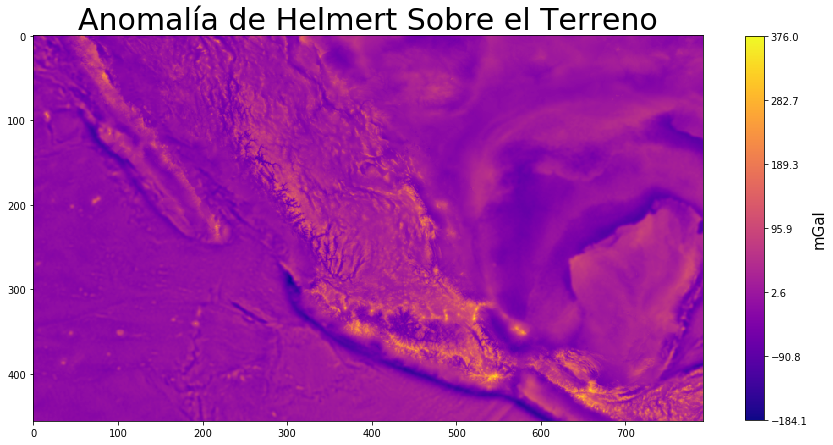

In [187]:
plt.figure(figsize=(15,15))
plt.imshow(mat[0],cmap='plasma')
plt.title(rut.split('/')[-1][:-4],fontsize=30)
tks=np.linspace(np.amin(mat[0]),np.amax(mat[0]),7)
cbar=plt.colorbar(shrink=.47,ticks=tks);
cbar.set_label('mGal',fontsize=15)

In [204]:
hs = es.hillshade(mat[0])

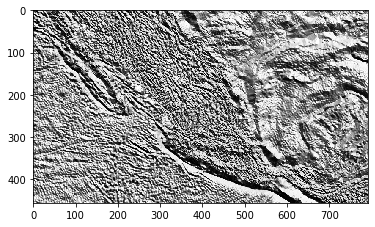

In [206]:
plt.imshow(hs,cmap='gray')

In [227]:
def mapita(mat):  
    plt.figure(figsize=(10,10))

    ax=plt.axes(projection=ccrs.PlateCarree())
    ext=[mat[1][0],mat[1][0]+mat[1][1]*mat[0].shape[1],mat[1][-3]+mat[1][-1]*mat[0].shape[0],mat[1][-3]]
    ax.set_extent(ext, crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')


    ax.imshow(hs,origin='upper',transform=ccrs.PlateCarree(),extent=ext,cmap='gray')
    ax.imshow(mat[0],origin='upper',transform=ccrs.PlateCarree(),extent=ext,cmap='jet',alpha=.7);

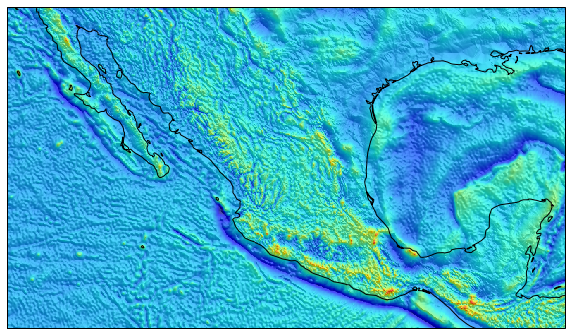

In [228]:
mapita(mat)

In [232]:
plt.rcParams.update(plt.rcParamsDefault)

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text xticklabel objects>)

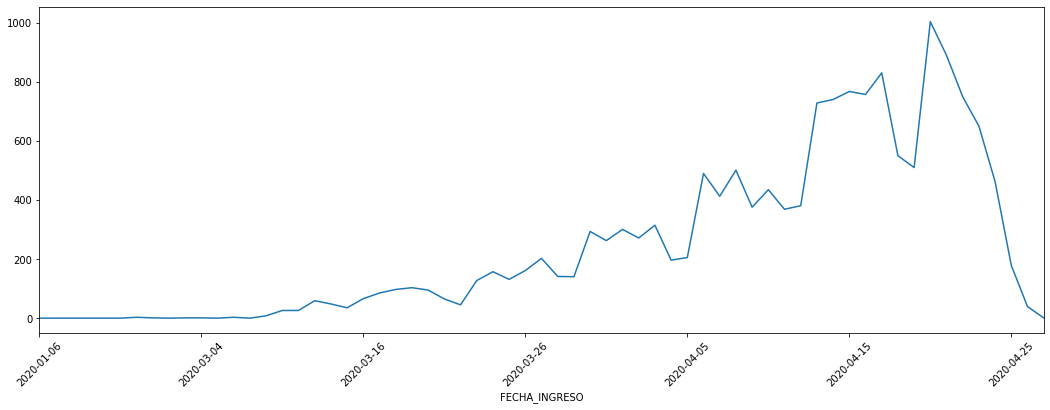

In [90]:
#plt.rcParams.update(plt.rcParamsDefault)
#plt.xkcd()
plt.figure(figsize=(18,6))
ax=cv[cv.RESULTADO==1].groupby('FECHA_INGRESO').RESULTADO.count().plot()
plt.xticks(rotation=45)

In [94]:
def dailytot(cv):  
    
    dp=cv[cv.RESULTADO==1]
    dp['Fecha']=pd.to_datetime(dp.FECHA_INGRESO)
    dp=dp.sort_values(by='Fecha')
    tot=[]
    dai=[]
    fec=[]
    n=0
    for i in dp.Fecha.unique():
        fec.append(i)
        dg=dp[dp.Fecha==i]
        dai.append(len(dg))
        tot.append(len(dg)+n)
        n+=len(dg)

    con=pd.DataFrame({'Fecha':fec,'Dia':np.arange(0,len(fec)),'Diario':dai,'Total':tot})
    con.Fecha=pd.to_datetime(con.Fecha)
    con=con.sort_values(by='Fecha')
    
    return con

In [95]:
con=dailytot(cv)

/Users/Raul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


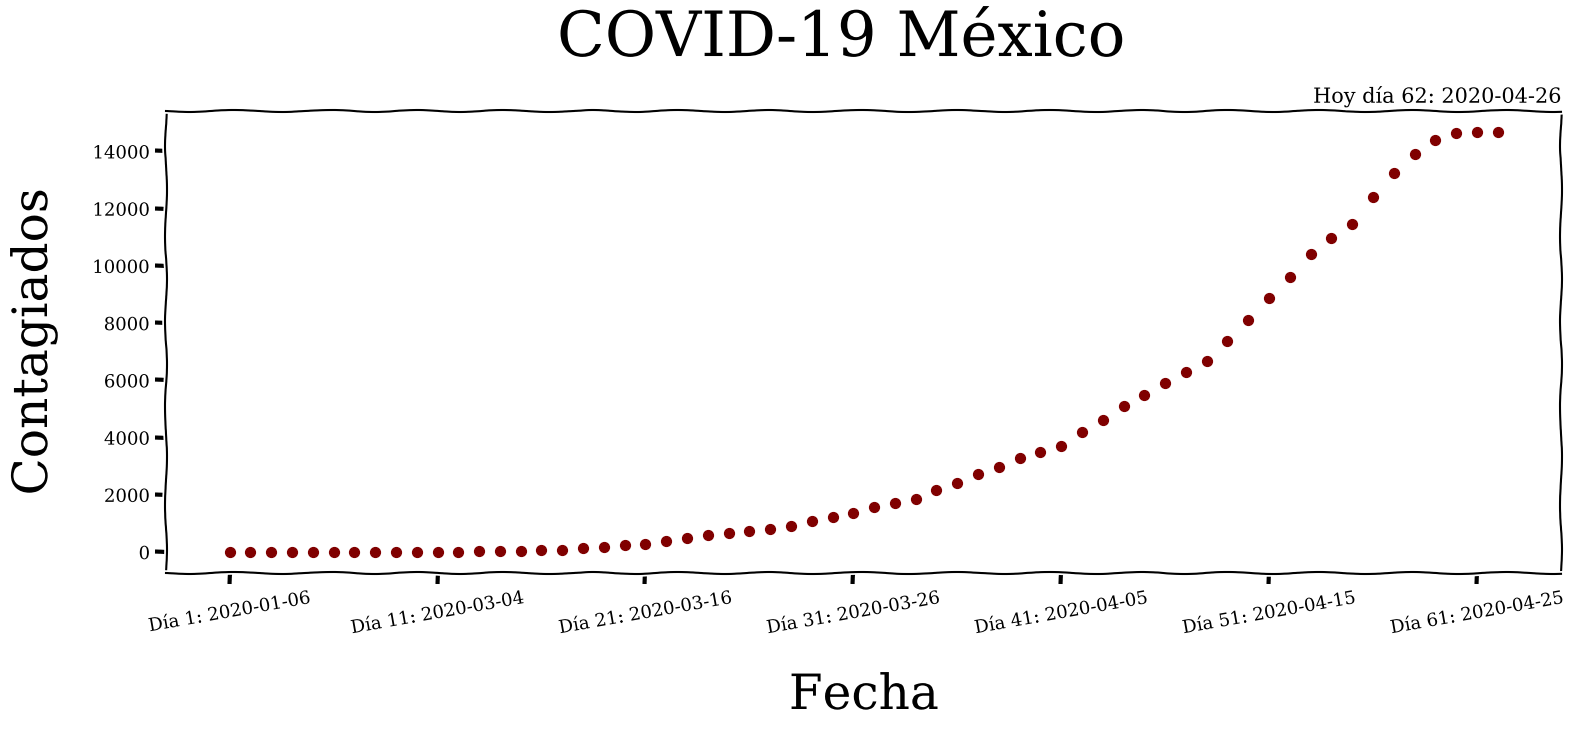

In [219]:
#plt.xkcd()
plt.figure(figsize=(18,6))
plt.scatter(con.Dia,con.Total,s=50,c='maroon')
plt.yticks(fontsize=13,fontname='serif')
x=plt.xticks()
fti=[]
for i in x[0][1:-1]:
    fti.append(str(con.Fecha.iloc[int(i)])[:10])
    
nt=['Día '+str(int(i)+1)+': '+j for i,j in zip(x[0][1:-1],fti)]
plt.xticks(x[0][1:-1],nt,fontsize=13,fontname='serif',rotation=10)

plt.ylabel('Contagiados',fontsize=35,fontname='serif',labelpad=25)
plt.xlabel('Fecha',fontsize=35,fontname='serif',labelpad=25)
plt.suptitle('COVID-19 México',fontsize=45,fontname='serif',y=1.05)
plt.title('Hoy día '+str(int(con.Dia.iloc[-1])+1)+': '+str(con.Fecha.iloc[-1])[:10],loc='right',fontsize=15,fontname='serif');


Text(1.0, 1.0, 'Hoy día 62: 2020-04-26')

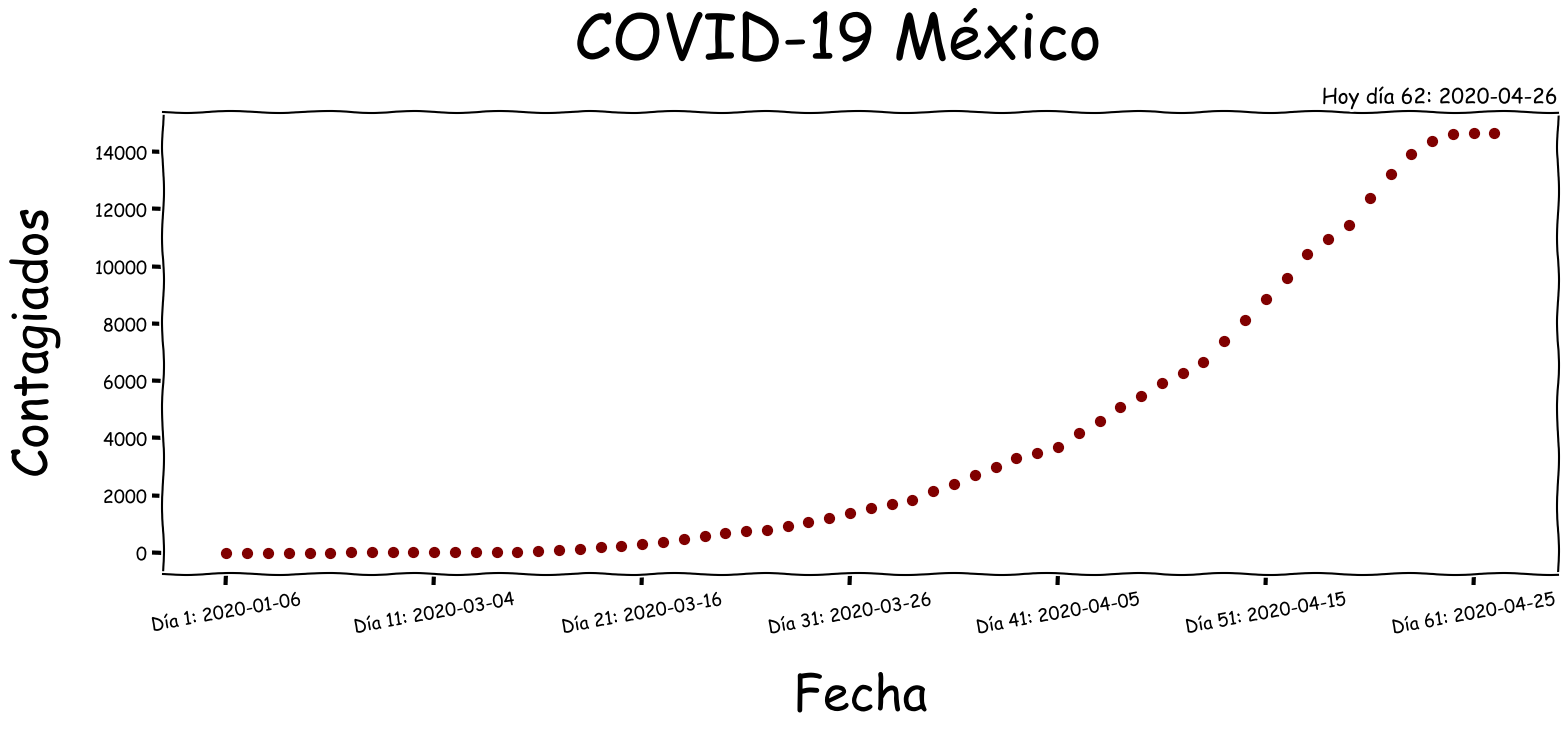

In [231]:
#plt.xkcd()
ax=plt.figure(figsize=(18,6))
plt.scatter(con.Dia,con.Total,s=50,c='maroon')
plt.yticks(fontsize=13)
x=plt.xticks()
fti=[]
for i in x[0][1:-1]:
    fti.append(str(con.Fecha.iloc[int(i)])[:10])
    
nt=['Día '+str(int(i)+1)+': '+j for i,j in zip(x[0][1:-1],fti)]
plt.xticks(x[0][1:-1],nt,fontsize=13,rotation=10)

plt.ylabel('Contagiados',fontsize=35,labelpad=25)
plt.xlabel('Fecha',fontsize=35,labelpad=25)
plt.suptitle('COVID-19 México',fontsize=45,y=1.05)
plt.title('Hoy día '+str(int(con.Dia.iloc[-1])+1)+': '+str(con.Fecha.iloc[-1])[:10],loc='right',fontsize=15)
plt.savefig('/Users/Raul/Desktop/Programacion/Python/Covid/try1.png',dpi=300,bbox_inches='tight');

In [96]:
con

,Fecha,Dia,Diario,Total
0,2020-01-06,0,1,1
1,2020-01-08,1,1,2
2,2020-02-07,2,1,3
3,2020-02-12,3,1,4
4,2020-02-14,4,1,5
...,...,...,...,...
58,2020-04-23,58,650,14846
59,2020-04-24,59,462,15308
60,2020-04-25,60,179,15487
61,2020-04-26,61,40,15527


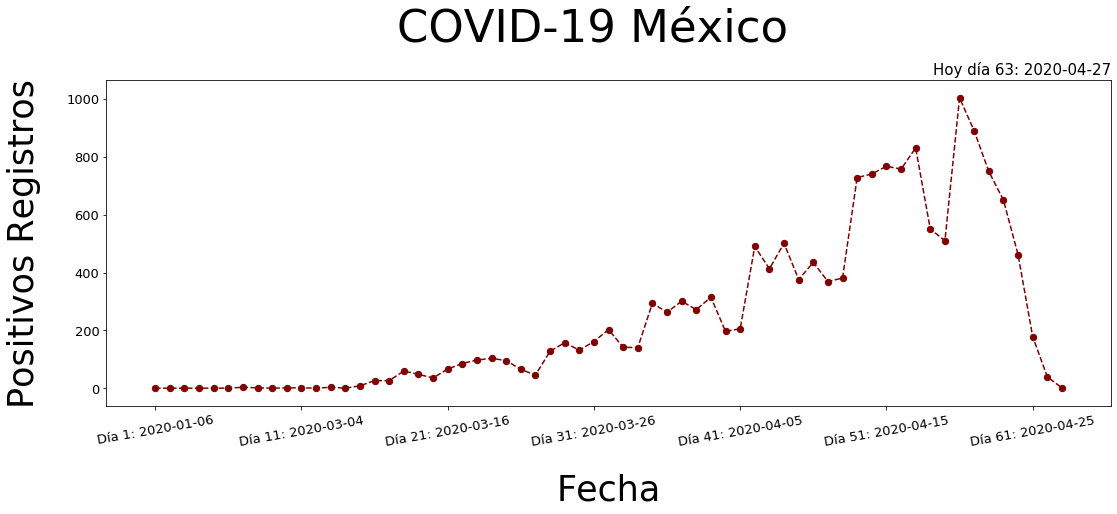

In [106]:
ax=plt.figure(figsize=(18,6))
plt.plot(con.Dia,con.Diario,color='maroon',linestyle='--')
plt.scatter(con.Dia,con.Diario,color='maroon',s=40)
plt.yticks(fontsize=13)
x=plt.xticks()
fti=[]
for i in x[0][1:-1]:
    fti.append(str(con.Fecha.iloc[int(i)])[:10])
    
nt=['Día '+str(int(i)+1)+': '+j for i,j in zip(x[0][1:-1],fti)]
plt.xticks(x[0][1:-1],nt,fontsize=13,rotation=10)

plt.ylabel('Positivos Registros',fontsize=35,labelpad=25)
plt.xlabel('Fecha',fontsize=35,labelpad=25)
plt.suptitle('COVID-19 México',fontsize=45,y=1.05)
plt.title('Hoy día '+str(int(con.Dia.iloc[-1])+1)+': '+str(con.Fecha.iloc[-1])[:10],loc='right',fontsize=15)
plt.savefig('/Users/Raul/Desktop/Programacion/Python/Covid/try2.png',dpi=500,bbox_inches='tight');